In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Load the grayscale image
image_path = "/media/tairo/Storages/CodeThayTien/XLA/ImgTest/grayscale.jpg"
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [8]:
# Perform FFT to transform the image to the frequency domain
f_transform = np.fft.fft2(gray_image)
f_transform_shifted = np.fft.fftshift(f_transform)

# Get the dimensions of the image
rows, cols = gray_image.shape
crow, ccol = rows // 2, cols // 2  # Center coordinates

# Define cutoff frequencies
cutoff_frequencies = [5, 15, 30, 60, 100, 150, 200, 250]

In [9]:
# Function to apply ideal low-pass filter and display results
def ideal_low_pass():
    plt.figure(figsize=(10, 10))
    for i, cutoff in enumerate(cutoff_frequencies):
        mask = np.zeros((rows, cols), np.uint8)
        cv2.circle(mask, (ccol, crow), cutoff, 1, thickness=-1)

        filtered_shifted = f_transform_shifted * mask
        inverse_shifted = np.fft.ifftshift(filtered_shifted)
        filtered_image = np.abs(np.fft.ifft2(inverse_shifted))

        plt.subplot(4, 2, i + 1)
        plt.imshow(filtered_image, cmap='gray')
        plt.title(f'Cutoff = {cutoff}')
        plt.axis('off')

    plt.suptitle('Ideal Low-Pass Filter Results')
    plt.tight_layout()
    plt.show()

# Function to apply Butterworth low-pass filter and display results
def butterworth_low_pass():
    plt.figure(figsize=(10, 10))
    for i, cutoff in enumerate(cutoff_frequencies):
        mask = np.zeros((rows, cols), np.float32)
        for u in range(rows):
            for v in range(cols):
                d = np.sqrt((u - crow)**2 + (v - ccol)**2)
                mask[u, v] = 1 / (1 + (d / cutoff)**(2 * 2))  # Butterworth filter with n=2

        filtered_shifted = f_transform_shifted * mask
        inverse_shifted = np.fft.ifftshift(filtered_shifted)
        filtered_image = np.abs(np.fft.ifft2(inverse_shifted))

        plt.subplot(4, 2, i + 1)
        plt.imshow(filtered_image, cmap='gray')
        plt.title(f'Cutoff = {cutoff}')
        plt.axis('off')

    plt.suptitle('Butterworth Low-Pass Filter Results')
    plt.tight_layout()
    plt.show()

# Function to apply Gaussian low-pass filter and display results
def gaussian_low_pass():
    plt.figure(figsize=(10, 10))
    for i, cutoff in enumerate(cutoff_frequencies):
        mask = np.zeros((rows, cols), np.float32)
        for u in range(rows):
            for v in range(cols):
                d = np.sqrt((u - crow)**2 + (v - ccol)**2)
                mask[u, v] = np.exp(- (d**2) / (2 * (cutoff**2)))  # Gaussian formula

        filtered_shifted = f_transform_shifted * mask
        inverse_shifted = np.fft.ifftshift(filtered_shifted)
        filtered_image = np.abs(np.fft.ifft2(inverse_shifted))

        plt.subplot(4, 2, i + 1)
        plt.imshow(filtered_image, cmap='gray')
        plt.title(f'Cutoff = {cutoff}')
        plt.axis('off')

    plt.suptitle('Gaussian Low-Pass Filter Results')
    plt.tight_layout()
    plt.show()


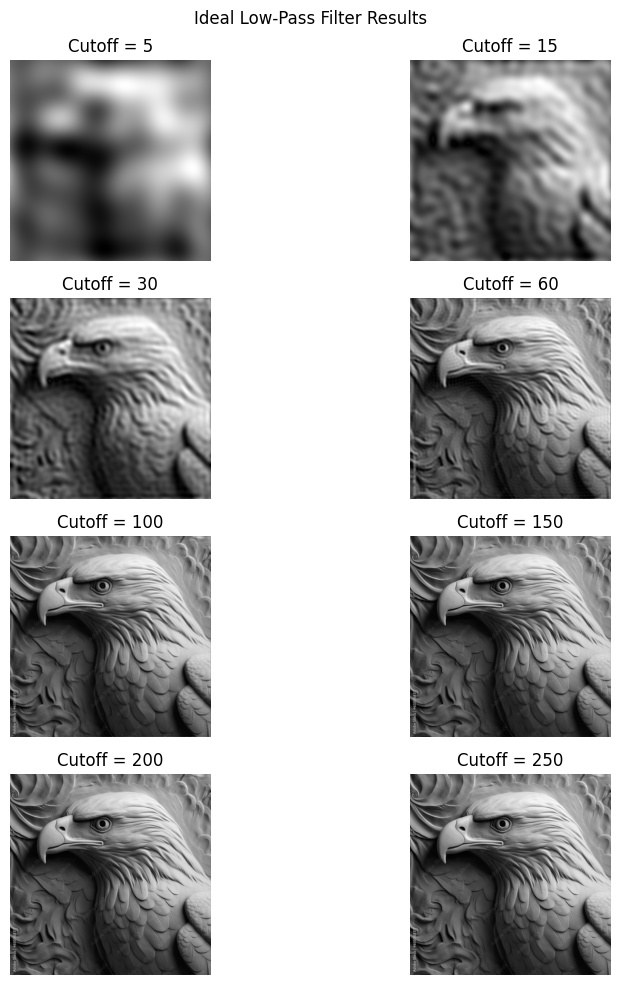

In [10]:
# Run the filters and display the results
ideal_low_pass()



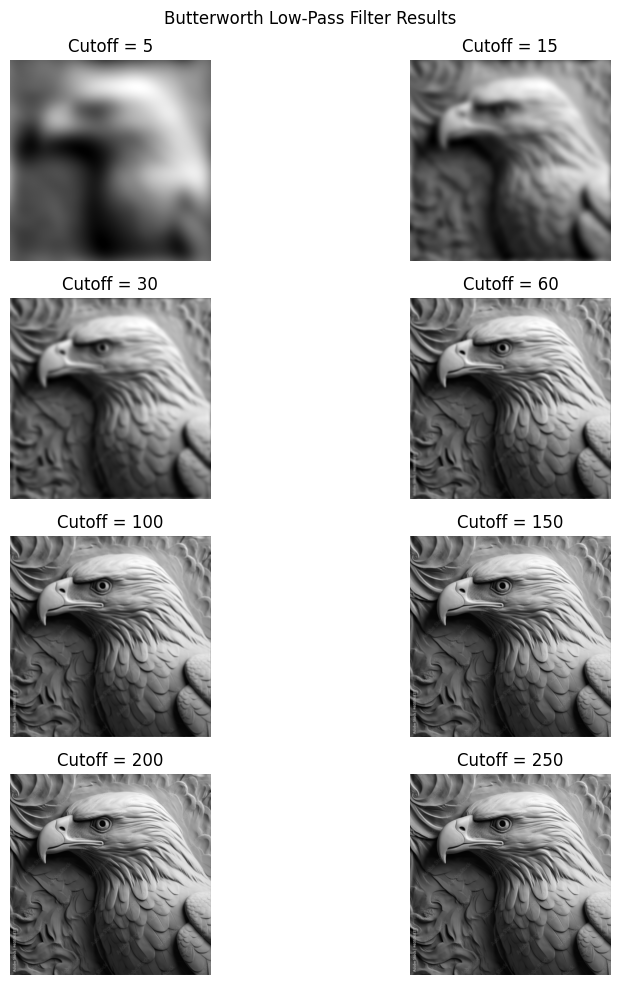

In [11]:
butterworth_low_pass()


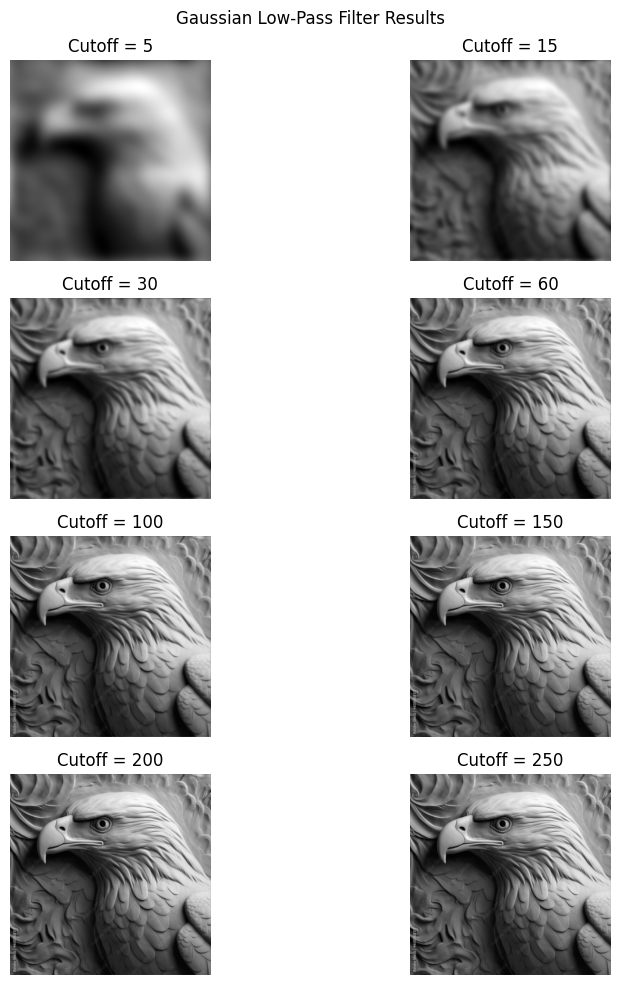

In [12]:
gaussian_low_pass()